In [10]:
import numpy as np
import matplotlib.pyplot as plt

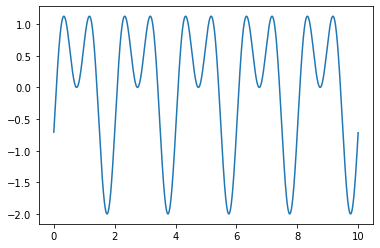

In [11]:
t = np.arange(0,10,0.001)
s = np.sin(2*np.pi*t)+np.sin(2*np.pi*t/2-np.pi/4)
plt.plot(t,s)
plt.show()

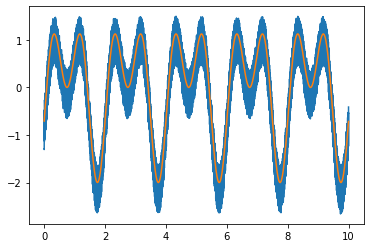

In [12]:
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t))
sn = s+n
plt.plot(t,sn)
plt.plot(t,s)
plt.show()

In [13]:
print(np.min(s)/10, np.max(s)/10, len(t))

-0.2 0.11249965672087192 10000


In [14]:
fil = np.ones(100)

s_for_conv = np.ones(len(s)+2*len(fil)//2-1)
s_for_conv[len(fil)//2:len(fil)//2+len(s)] = sn
print(len(s_for_conv))

10099


In [15]:
s_matrix = []
for i in range(len(s)):
    s_matrix.append(s_for_conv[i:i+len(fil)])
print(len(s_matrix))
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

10000
(10000, 100)


In [16]:
c = np.linalg.lstsq(s_matrix, s)
print(c[0])

[0.00393492 0.00386343 0.00418843 0.00397361 0.00410916 0.00377815
 0.00382564 0.00360294 0.00360911 0.0039702  0.00369679 0.00385689
 0.00409447 0.0043412  0.0045425  0.00478872 0.00487518 0.00517981
 0.00567867 0.00583675 0.00590098 0.00572809 0.0060616  0.00615384
 0.00658108 0.00651557 0.00706067 0.00737743 0.00806657 0.00845934
 0.00928207 0.01014076 0.01059617 0.01119395 0.01211652 0.01249731
 0.01340206 0.01410946 0.01510131 0.01564976 0.01656385 0.01768832
 0.01861519 0.01932044 0.02008775 0.02109252 0.02214706 0.02366023
 0.02487314 0.02672637 0.02800464 0.02602882 0.02405304 0.02236902
 0.02084107 0.01963018 0.01848744 0.01751364 0.01672484 0.01588005
 0.01454587 0.01362046 0.01293373 0.01243256 0.01188326 0.01154904
 0.01123709 0.01046904 0.01003883 0.00981687 0.00935027 0.00874348
 0.00884261 0.0085042  0.00811778 0.00743055 0.00673255 0.00645315
 0.0061768  0.0056631  0.00592601 0.00613428 0.00570423 0.00583447
 0.00595071 0.005588   0.00487062 0.00433761 0.00429634 0.0042

<ipython-input-16-0c9ba1b11798>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, s)


In [17]:
coeff = 0.00001

fil = np.zeros(len(fil))
filtered_signal = []
for i in range(len(s_matrix)):
    e = s_matrix[i] - fil @ s_matrix[i]
    filtered_signal.append(fil @ s_matrix[i])
    A = np.tile(s_matrix[i], ((len(fil),1))).T
    fil = fil + (coeff*A) @ e

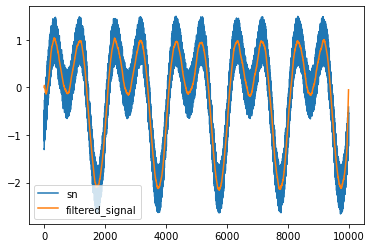

In [18]:
plt.plot(sn, label = 'sn')
plt.plot(filtered_signal, label = 'filtered_signal')
plt.legend()
plt.show()